<a href="https://colab.research.google.com/github/MallikarjunShettar/Codsoft/blob/main/Titanic%20Survival%20predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
mode_age=df['Age'].mode()[0]
df['Age'].fillna(mode_age,inplace=True)
fare_mean=df['Fare'].mean()
df['Fare'].fillna(fare_mean,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [7]:
def Confusion_Matrix(cm):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [8]:
fit_model=LabelEncoder()
df['Sex']=fit_model.fit_transform(df['Sex'])
df['Embarked']=fit_model.fit_transform(df['Embarked'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 39.3+ KB


In [10]:
Y=df.Survived
X=df.drop(columns=['PassengerId','Name','Survived','Cabin','Ticket'])

In [11]:
x_tr,x_te,y_tr,y_te=train_test_split(X,Y,test_size=0.3)

In [12]:
models={"SVM":SVC(kernel='rbf'),'Decision Trees':DecisionTreeClassifier(),'K-Nearst-Neighbors':KNeighborsClassifier(n_neighbors=4),'Discriminant-Analysis':LinearDiscriminantAnalysis(),'Ada-Boost-Classifier':AdaBoostClassifier(learning_rate=10),'XGBoost-Classifier':XGBClassifier(learning_rate=10),'Random-Forest-Classifier':RandomForestClassifier(n_estimators=4)}

_______Model Name is SVM_______
Accuracy_Score: 0.6428571428571429
Confusion_Matrix: [[75 12]
 [33  6]]


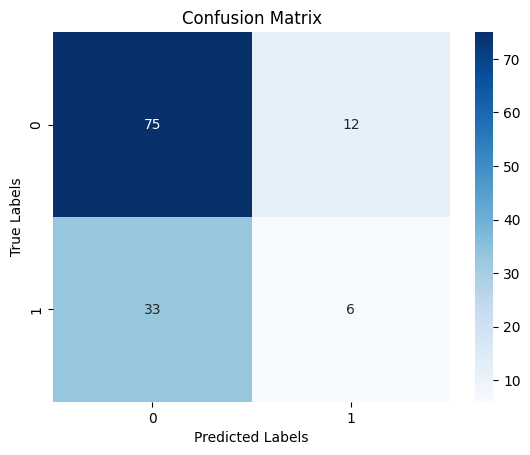





_______Model Name is Decision Trees_______
Accuracy_Score: 1.0
Confusion_Matrix: [[87  0]
 [ 0 39]]


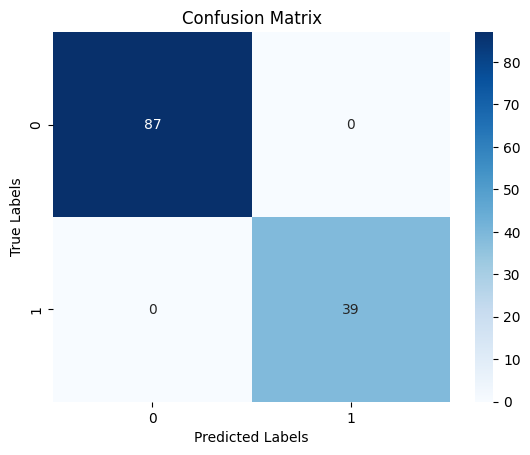





_______Model Name is K-Nearst-Neighbors_______
Accuracy_Score: 0.6507936507936508
Confusion_Matrix: [[69 18]
 [26 13]]


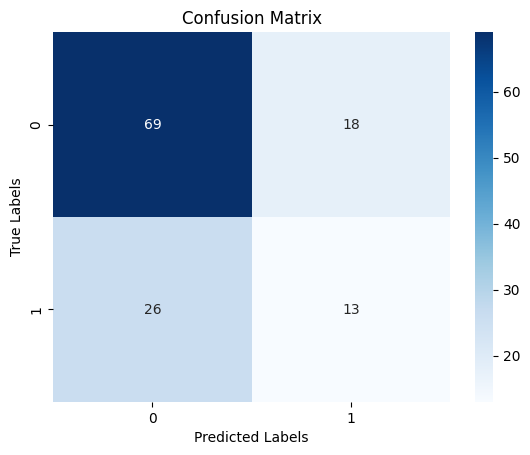





_______Model Name is Discriminant-Analysis_______
Accuracy_Score: 0.6428571428571429
Confusion_Matrix: [[74 13]
 [32  7]]


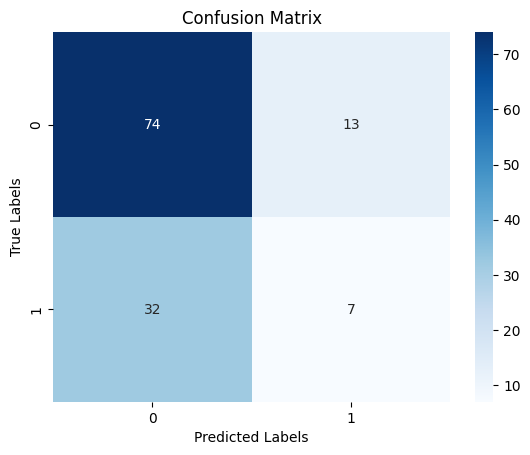





_______Model Name is Ada-Boost-Classifier_______
Accuracy_Score: 1.0
Confusion_Matrix: [[87  0]
 [ 0 39]]


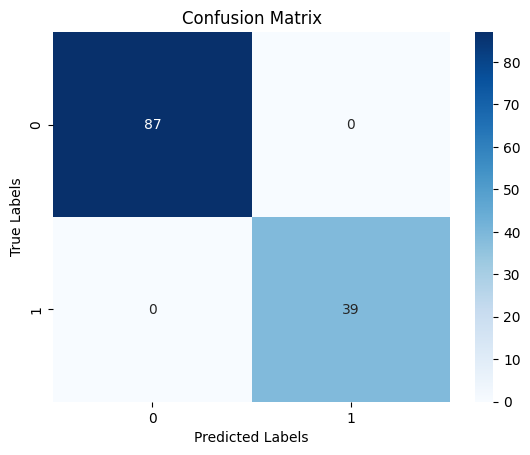





_______Model Name is XGBoost-Classifier_______
Accuracy_Score: 1.0
Confusion_Matrix: [[87  0]
 [ 0 39]]


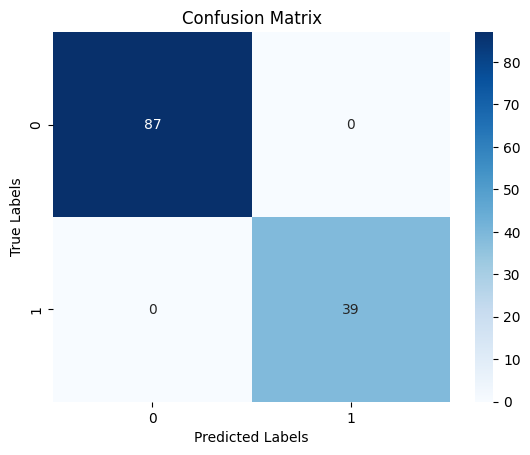





_______Model Name is Random-Forest-Classifier_______
Accuracy_Score: 1.0
Confusion_Matrix: [[87  0]
 [ 0 39]]


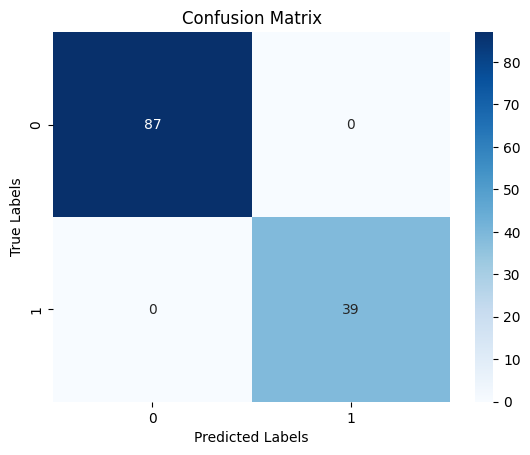

In [13]:
for i,model in models.items():
    print(f'_______Model Name is {i}_______')
    model.fit(x_tr,y_tr)
    y_pr=model.predict(x_te)
    print('Accuracy_Score:',accuracy_score(y_te,y_pr))
    print("Confusion_Matrix:",confusion_matrix(y_te,y_pr))
    Confusion_Matrix(confusion_matrix(y_te,y_pr))
    print("\n")
    print('\n')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')